# Fresnel propagation through a HST-style system using TOLIMAN parameters

The Fresnel propagation code was causing various crashes when I dived straight into it. As an interim measure I used the example HST code, plugging in the parameters from Eduardo's Ritchey-Chrétien design.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import poppy
from poppy.poppy_core import PlaneType
import astropy.units as u
import astropy.io.fits as fits

	Entrance pupil diam:  0.3 m	npix: 1024	Beam ratio:0.5
	Optic: Circle, radius=0.15 m
	Pupil plane: Secondary Obscuration with 5 supports (Analytic)
	Propagation distance:  0.559337630333726 m
	Lens: Primary, with focal length 0.5717255 m
	Propagation distance:  0.559337630333726 m
	Lens: Secondary, with focal length -0.02337895948639565 m
	Propagation distance:  0.589999999989853 m
	Image plane: focus (Analytic)


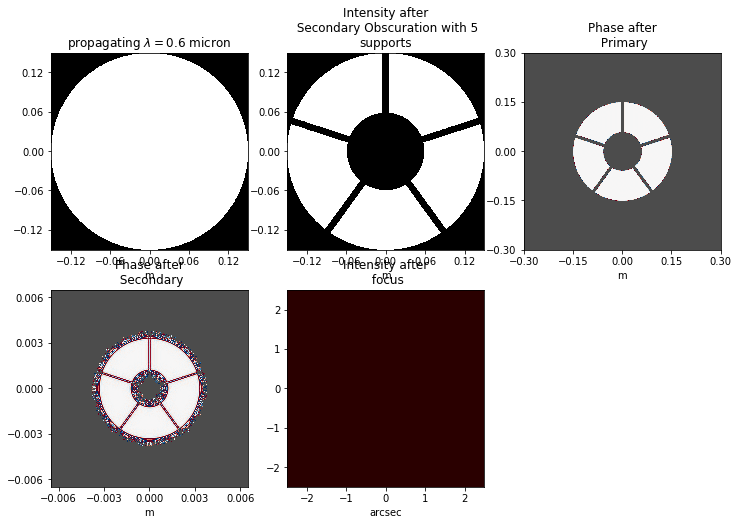

In [2]:
# Values from Eduardo's RC Toliman system
diam = 0.3 * u.m
m1_fl = 0.5*1.143451 * u.m
m1_m2_sep = 0.559337630333726 * u.m
m2_fl = -0.5*0.0467579189727913 * u.m
m2_focus_sep = 0.589999999989853 * u.m # 0.018 * u.m
m2_rad = 0.059 * u.m
m2_strut_width = 0.01 * u.m
m2_supports = 5
epsilon = 0.0 * u.m

tol = poppy.FresnelOpticalSystem(pupil_diameter=diam, npix=1024, beam_ratio=0.5) #25)
m1 = poppy.QuadraticLens(m1_fl, name='Primary')
m2 = poppy.QuadraticLens(m2_fl, name='Secondary')

tol.add_optic(poppy.CircularAperture(radius=diam.value/2))
tol.add_optic(poppy.SecondaryObscuration(secondary_radius=m2_rad,
                                 support_width=m2_strut_width,
                                 support_angle_offset=90, n_supports=m2_supports))
tol.add_optic(m1, distance=m1_m2_sep)
tol.add_optic(m2, distance=m1_m2_sep)
tol.add_optic(poppy.ScalarTransmission(planetype=PlaneType.image, name='focus'), distance=m2_focus_sep+epsilon);
#hst.add_detector(distance=0.018*0.528*u.m, pixelscale=); #m2_focus_sep);


tol.describe()
plt.figure(figsize=(12,8))
psf, waves = tol.calcPSF(wavelength=0.6e-6, display_intermediates=True, return_intermediates=True)



	Entrance pupil diam:  0.3 m	npix: 1024	Beam ratio:0.5
	Optic: Circle, radius=0.15 m
	Pupil plane: Secondary Obscuration with 5 supports (Analytic)
	Propagation distance:  0.559337630333726 m
	Lens: Primary, with focal length 15.067 m
	Propagation distance:  0.559337630333726 m
	Lens: Secondary, with focal length -200000.0 m
	Propagation distance:  14.507662369666274 m
	Image plane: focus (Analytic)


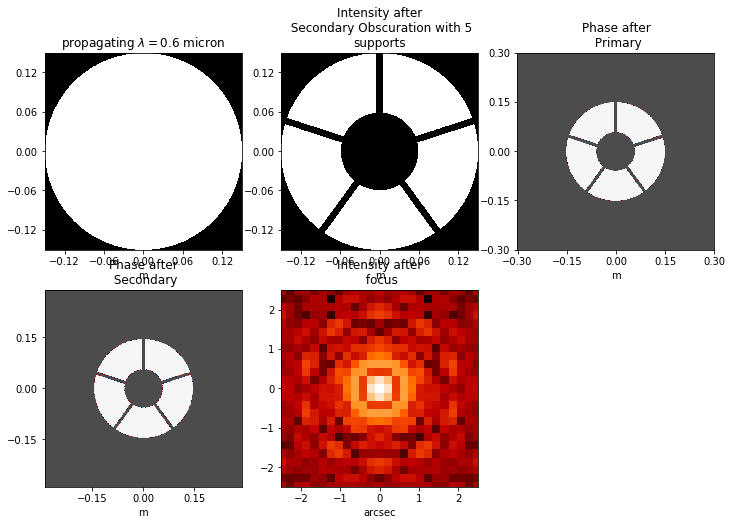

In [3]:
# Simplified version
diam = 0.3 * u.m
m1_fl = 15.067*u.m#0.5*1.143451 * u.m
m1_m2_sep = 0.559337630333726 * u.m
m2_fl = -200000*u.m#0.5*0.0467579189727913 * u.m
m2_focus_sep = m1_fl - m1_m2_sep #0.6033*u.m#0.1*u.m#0.589999999989853 * u.m #0.5*1.143451 * u.m # 0.018 * u.m
m2_rad = 0.059 * u.m
m2_strut_width = 0.01 * u.m
m2_supports = 5
epsilon = 0.0 * u.m

tol = poppy.FresnelOpticalSystem(pupil_diameter=diam, npix=1024, beam_ratio=0.5) #25)
m1 = poppy.QuadraticLens(m1_fl, name='Primary')
m2 = poppy.QuadraticLens(m2_fl, name='Secondary')

tol.add_optic(poppy.CircularAperture(radius=diam.value/2))
tol.add_optic(poppy.SecondaryObscuration(secondary_radius=m2_rad,
                                 support_width=m2_strut_width,
                                 support_angle_offset=90, n_supports=m2_supports))
tol.add_optic(m1, distance=m1_m2_sep)
tol.add_optic(m2, distance=m1_m2_sep)
tol.add_optic(poppy.ScalarTransmission(planetype=PlaneType.image, name='focus'), distance=m2_focus_sep+epsilon);
#hst.add_detector(distance=0.018*0.528*u.m, pixelscale=); #m2_focus_sep);


tol.describe()
plt.figure(figsize=(12,8))
psf, waves = tol.calcPSF(wavelength=0.6e-6, display_intermediates=True, return_intermediates=True)



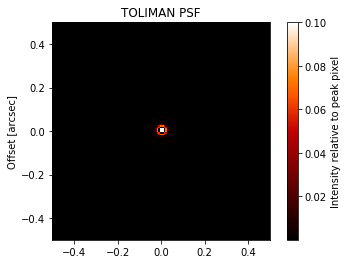

In [4]:
# PSF doesn't show well with normal settings, so the normalization needs to
# be explicitly set to show things properly.
as_per_pixel = 13.52/2048.0
poppy.display_PSF(psf,pixelscale=as_per_pixel, normalize='peak',scale='linear', imagecrop=1)
plt.title('TOLIMAN PSF')
plt.ylabel("Offset [arcsec]");

	Entrance pupil diam:  0.3 m	npix: 1024	Beam ratio:0.5
	Optic: Circle, radius=0.15 m
	Pupil plane: Secondary Obscuration with 5 supports (Analytic)
	Propagation distance:  0.559337630333726 m
	Lens: Primary, with focal length 0.5717255 m
	Propagation distance:  0.559337630333726 m
	Lens: Secondary, with focal length -2000.0 m
	Propagation distance:  0.012387792937091852 m
	Image plane: focus (Analytic)


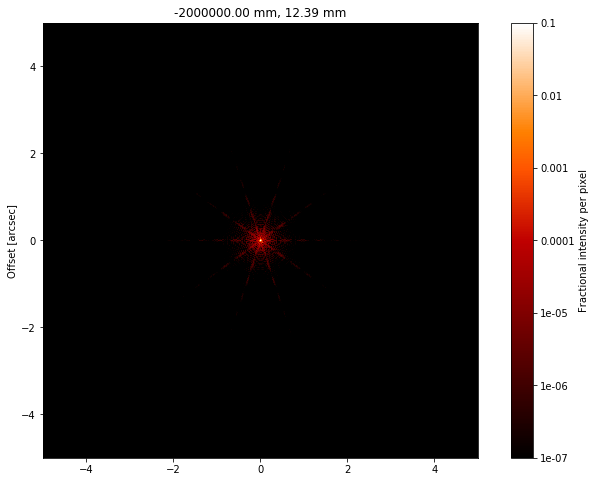

	Entrance pupil diam:  0.3 m	npix: 1024	Beam ratio:0.5
	Optic: Circle, radius=0.15 m
	Pupil plane: Secondary Obscuration with 5 supports (Analytic)
	Propagation distance:  0.559337630333726 m
	Lens: Primary, with focal length 0.5717255 m
	Propagation distance:  0.559337630333726 m
	Lens: Secondary, with focal length -1000.0 m
	Propagation distance:  0.012387716208860172 m
	Image plane: focus (Analytic)


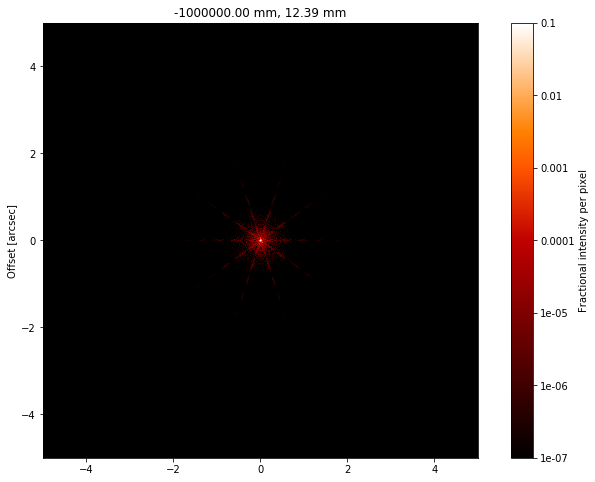

	Entrance pupil diam:  0.3 m	npix: 1024	Beam ratio:0.5
	Optic: Circle, radius=0.15 m
	Pupil plane: Secondary Obscuration with 5 supports (Analytic)
	Propagation distance:  0.559337630333726 m
	Lens: Primary, with focal length 0.5717255 m
	Propagation distance:  0.559337630333726 m
	Lens: Secondary, with focal length -750.0 m
	Propagation distance:  0.012387665057233767 m
	Image plane: focus (Analytic)


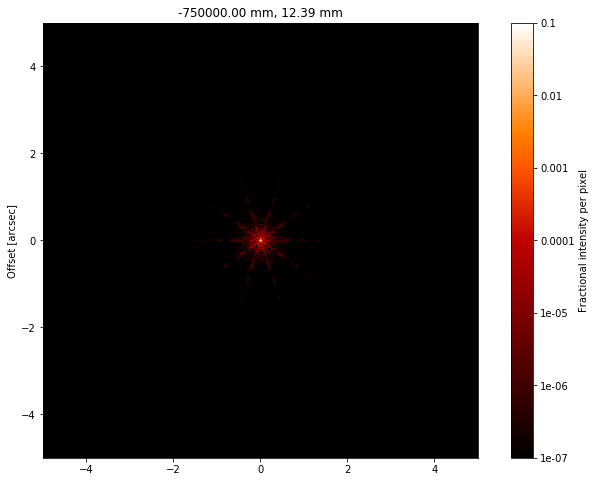

	Entrance pupil diam:  0.3 m	npix: 1024	Beam ratio:0.5
	Optic: Circle, radius=0.15 m
	Pupil plane: Secondary Obscuration with 5 supports (Analytic)
	Propagation distance:  0.559337630333726 m
	Lens: Primary, with focal length 0.5717255 m
	Propagation distance:  0.559337630333726 m
	Lens: Secondary, with focal length -500.0 m
	Propagation distance:  0.012387562755248242 m
	Image plane: focus (Analytic)


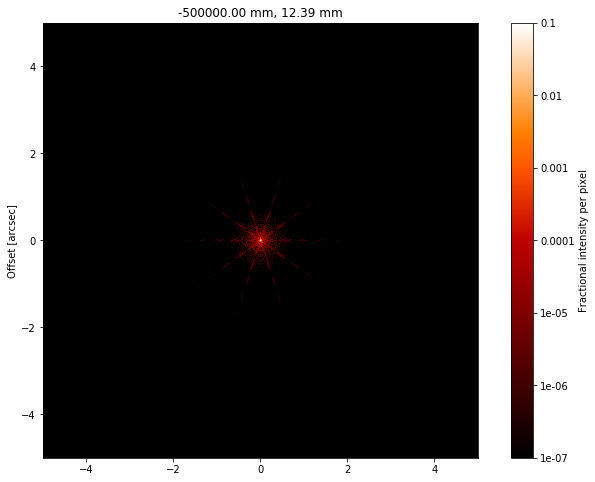

	Entrance pupil diam:  0.3 m	npix: 1024	Beam ratio:0.5
	Optic: Circle, radius=0.15 m
	Pupil plane: Secondary Obscuration with 5 supports (Analytic)
	Propagation distance:  0.559337630333726 m
	Lens: Primary, with focal length 0.5717255 m
	Propagation distance:  0.559337630333726 m
	Lens: Secondary, with focal length -250.0 m
	Propagation distance:  0.012387255859429595 m
	Image plane: focus (Analytic)


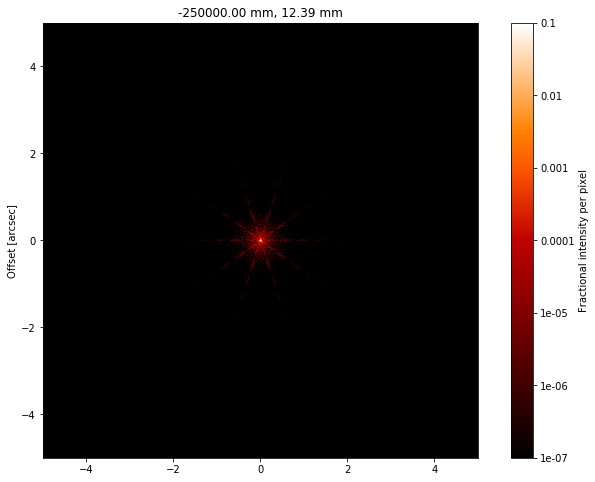

	Entrance pupil diam:  0.3 m	npix: 1024	Beam ratio:0.5
	Optic: Circle, radius=0.15 m
	Pupil plane: Secondary Obscuration with 5 supports (Analytic)
	Propagation distance:  0.559337630333726 m
	Lens: Primary, with focal length 0.5717255 m
	Propagation distance:  0.559337630333726 m
	Lens: Secondary, with focal length -100.0 m
	Propagation distance:  0.012386335263205199 m
	Image plane: focus (Analytic)


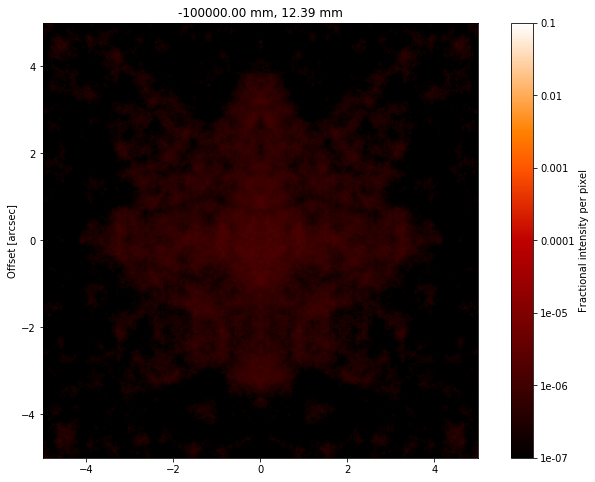

	Entrance pupil diam:  0.3 m	npix: 1024	Beam ratio:0.5
	Optic: Circle, radius=0.15 m
	Pupil plane: Secondary Obscuration with 5 supports (Analytic)
	Propagation distance:  0.559337630333726 m
	Lens: Primary, with focal length 0.5717255 m
	Propagation distance:  0.559337630333726 m
	Lens: Secondary, with focal length -50.0 m
	Propagation distance:  0.012384801240201904 m
	Image plane: focus (Analytic)


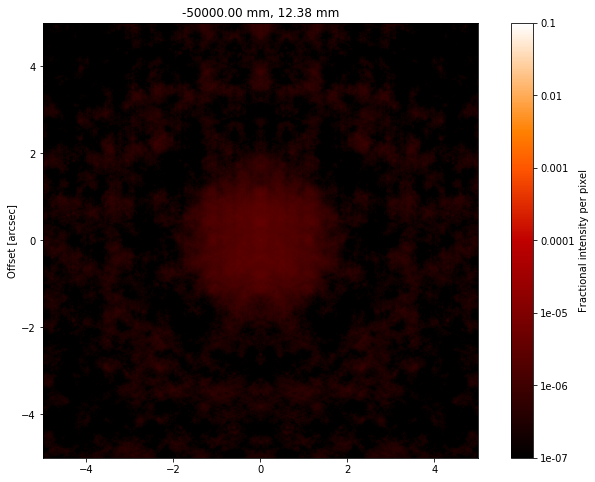

	Entrance pupil diam:  0.3 m	npix: 1024	Beam ratio:0.5
	Optic: Circle, radius=0.15 m
	Pupil plane: Secondary Obscuration with 5 supports (Analytic)
	Propagation distance:  0.559337630333726 m
	Lens: Primary, with focal length 0.5717255 m
	Propagation distance:  0.559337630333726 m
	Lens: Secondary, with focal length -5.0 m
	Propagation distance:  0.012357253656727508 m
	Image plane: focus (Analytic)


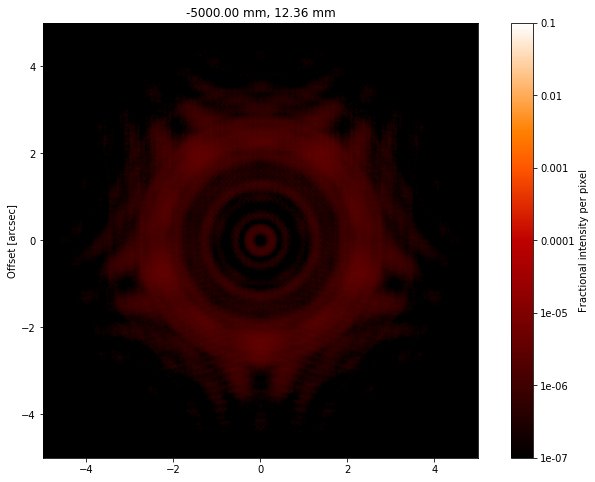

	Entrance pupil diam:  0.3 m	npix: 1024	Beam ratio:0.5
	Optic: Circle, radius=0.15 m
	Pupil plane: Secondary Obscuration with 5 supports (Analytic)
	Propagation distance:  0.559337630333726 m
	Lens: Primary, with focal length 0.5717255 m
	Propagation distance:  0.559337630333726 m
	Lens: Secondary, with focal length -0.5 m
	Propagation distance:  0.012088371329265112 m
	Image plane: focus (Analytic)


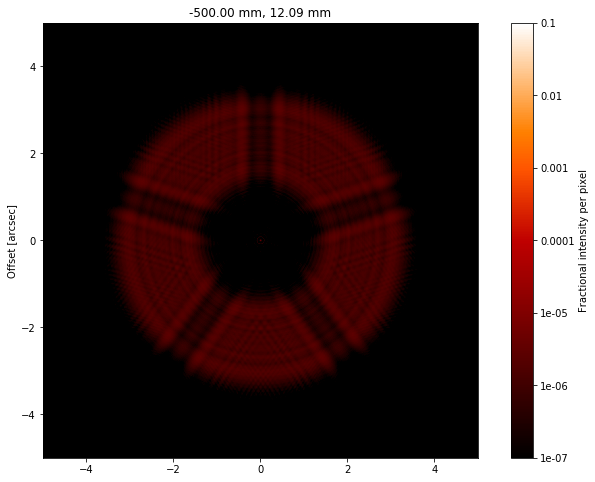

	Entrance pupil diam:  0.3 m	npix: 1024	Beam ratio:0.5
	Optic: Circle, radius=0.15 m
	Pupil plane: Secondary Obscuration with 5 supports (Analytic)
	Propagation distance:  0.559337630333726 m
	Lens: Primary, with focal length 0.5717255 m
	Propagation distance:  0.559337630333726 m
	Lens: Secondary, with focal length -0.05 m
	Propagation distance:  0.009928107605324064 m
	Image plane: focus (Analytic)


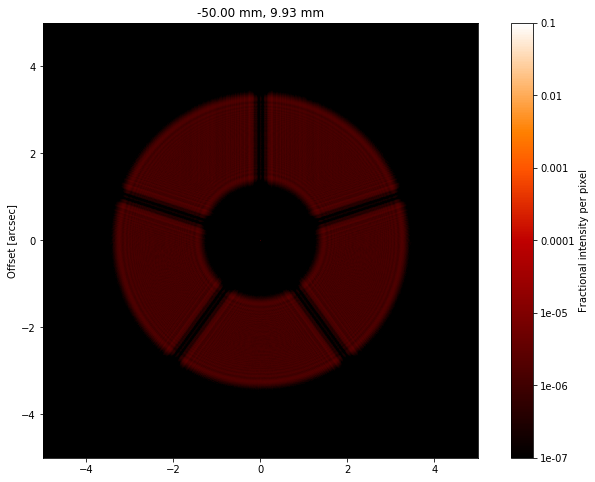

In [14]:
logging.getLogger().setLevel(logging.WARN)
# Want to vary focal position to match with R2.
diam = 0.3 * u.m
m1_fl = 0.5*1.143451 * u.m
m1_m2_sep = 0.559337630333726 * u.m
m2_rad = 0.059 * u.m
m2_strut_width = 0.01 * u.m
m2_supports = 5
p = m1_fl - m1_m2_sep

# M= q/p
# R2 = 2*p*M/(M-1)
#f2 = R2/2 = p*M / (M-1)
# p = f1-q
for x in [2000, 1000, 750, 500, 250, 100, 50, 5, 0.5, 0.05]:
    m2_fl = -x*u.m#0.5*0.0467579189727913 * u.m
    m2_focus_sep = m2_fl*p/(m2_fl-p)# #0.6033*u.m#0.1*u.m#0.589999999989853 * u.m #0.5*1.143451 * u.m # 0.018 * u.m
    epsilon = 0.0 * u.m

    tol = poppy.FresnelOpticalSystem(pupil_diameter=diam, npix=1024, beam_ratio=0.5) #25)
    m1 = poppy.QuadraticLens(m1_fl, name='Primary')
    m2 = poppy.QuadraticLens(m2_fl, name='Secondary')

    tol.add_optic(poppy.CircularAperture(radius=diam.value/2))
    tol.add_optic(poppy.SecondaryObscuration(secondary_radius=m2_rad,
                                     support_width=m2_strut_width,
                                     support_angle_offset=90, n_supports=m2_supports))
    tol.add_optic(m1, distance=m1_m2_sep)
    tol.add_optic(m2, distance=m1_m2_sep)
    tol.add_optic(poppy.ScalarTransmission(planetype=PlaneType.image, name='focus'), distance=m2_focus_sep+epsilon);

    tol.describe()
    plt.figure(figsize=(12,8))
    psf, waves = tol.calcPSF(wavelength=0.6e-6, display_intermediates=False, return_intermediates=True)
    poppy.display_PSF(psf,pixelscale=as_per_pixel,scale='log', imagecrop=10)
    plt.title('{:.2f} mm, {:.2f} mm'.format(1000*m2_fl.value, 1000*m2_focus_sep.value))
    plt.ylabel("Offset [arcsec]");
    plt.show()


	Entrance pupil diam:  0.3 m	npix: 1024	Beam ratio:0.5
	Optic: Circle, radius=0.15 m
	Pupil plane: Secondary Obscuration with 5 supports (Analytic)
	Propagation distance:  0.559337630333726 m
	Lens: Primary, with focal length 15.0 m
	Propagation distance:  15.0 m
	Image plane: focus (Analytic)


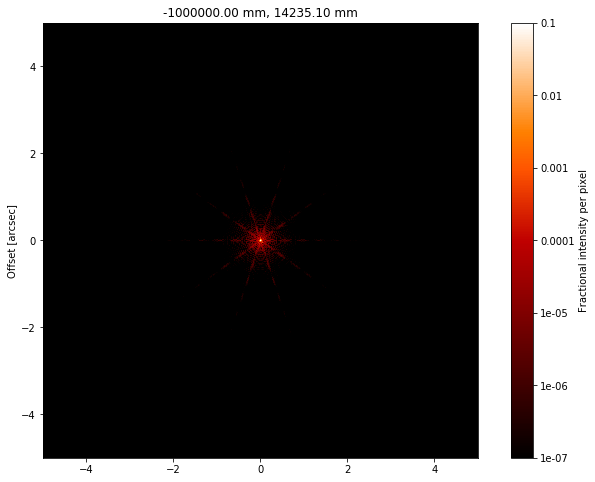

In [16]:
logging.getLogger().setLevel(logging.WARN)
# Just M1
diam = 0.3 * u.m
m1_fl = 15 * u.m
m1_m2_sep = 0.559337630333726 * u.m
m2_rad = 0.059 * u.m
m2_strut_width = 0.01 * u.m
m2_supports = 5
epsilon = 0.0 * u.m

tol = poppy.FresnelOpticalSystem(pupil_diameter=diam, npix=1024, beam_ratio=0.5) #25)
m1 = poppy.QuadraticLens(m1_fl, name='Primary')

tol.add_optic(poppy.CircularAperture(radius=diam.value/2))
tol.add_optic(poppy.SecondaryObscuration(secondary_radius=m2_rad,
                                 support_width=m2_strut_width,
                                 support_angle_offset=90, n_supports=m2_supports))
tol.add_optic(m1, distance=m1_m2_sep)
tol.add_optic(poppy.ScalarTransmission(planetype=PlaneType.image, name='focus'), distance=m1_fl+epsilon);

tol.describe()
plt.figure(figsize=(12,8))
psf, waves = tol.calcPSF(wavelength=0.6e-6, display_intermediates=False, return_intermediates=True)
poppy.display_PSF(psf,pixelscale=as_per_pixel,scale='log', imagecrop=10)
plt.title('{:.2f} mm, {:.2f} mm'.format(1000*m2_fl.value, 1000*m2_focus_sep.value))
plt.ylabel("Offset [arcsec]");
plt.show()


	Entrance pupil diam:  0.3 m	npix: 1024	Beam ratio:0.5
	Optic: Circle, radius=0.15 m
	Pupil plane: Secondary Obscuration with 5 supports (Analytic)
	Propagation distance:  0.559337630333726 m
	Lens: Primary, with focal length 0.5717255 m
	Propagation distance:  0.559337630333726 m
	Lens: Secondary, with focal length -200.0 m
	Propagation distance:  0.012387102417222596 m
	Image plane: focus (Analytic)


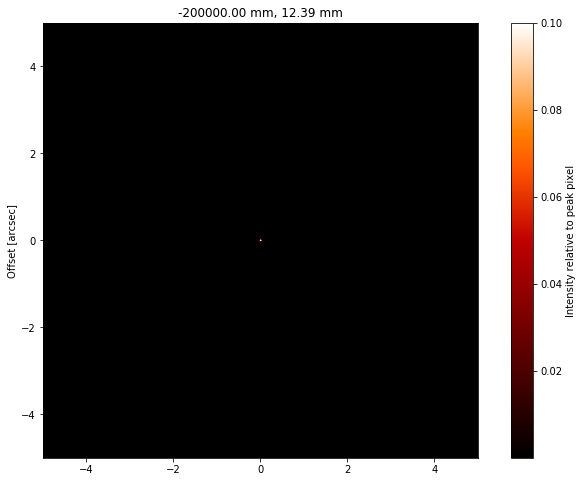

	Entrance pupil diam:  0.3 m	npix: 1024	Beam ratio:0.5
	Optic: Circle, radius=0.15 m
	Pupil plane: Secondary Obscuration with 5 supports (Analytic)
	Propagation distance:  0.559337630333726 m
	Lens: Primary, with focal length 0.5717255 m
	Propagation distance:  0.559337630333726 m
	Lens: Secondary, with focal length -150.0 m
	Propagation distance:  0.01238684668865833 m
	Image plane: focus (Analytic)


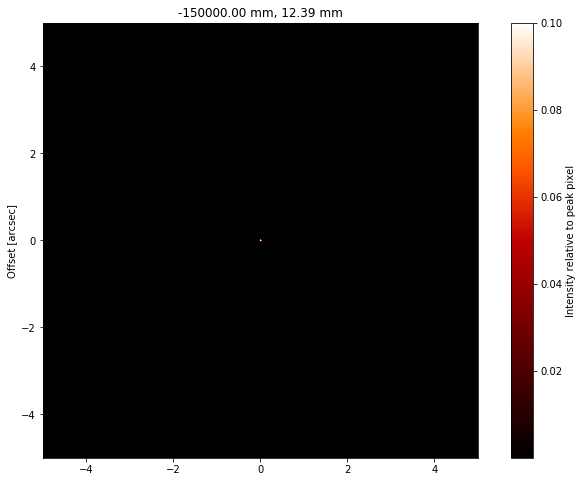

	Entrance pupil diam:  0.3 m	npix: 1024	Beam ratio:0.5
	Optic: Circle, radius=0.15 m
	Pupil plane: Secondary Obscuration with 5 supports (Analytic)
	Propagation distance:  0.559337630333726 m
	Lens: Primary, with focal length 0.5717255 m
	Propagation distance:  0.559337630333726 m
	Lens: Secondary, with focal length -100.0 m
	Propagation distance:  0.012386335263205199 m
	Image plane: focus (Analytic)


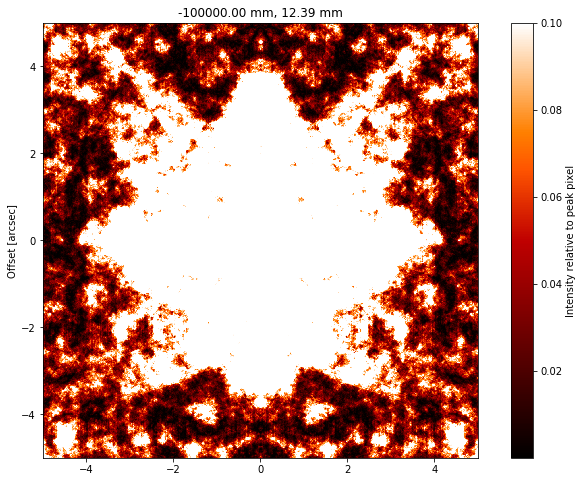

In [6]:
for x in [200, 150, 100]:
    m2_fl = -x*u.m#0.5*0.0467579189727913 * u.m
    m2_focus_sep = m2_fl*p/(m2_fl-p)# #0.6033*u.m#0.1*u.m#0.589999999989853 * u.m #0.5*1.143451 * u.m # 0.018 * u.m
    epsilon = 0.0 * u.m

    tol = poppy.FresnelOpticalSystem(pupil_diameter=diam, npix=1024, beam_ratio=0.5) #25)
    m1 = poppy.QuadraticLens(m1_fl, name='Primary')
    m2 = poppy.QuadraticLens(m2_fl, name='Secondary')

    tol.add_optic(poppy.CircularAperture(radius=diam.value/2))
    tol.add_optic(poppy.SecondaryObscuration(secondary_radius=m2_rad,
                                     support_width=m2_strut_width,
                                     support_angle_offset=90, n_supports=m2_supports))
    tol.add_optic(m1, distance=m1_m2_sep)
    tol.add_optic(m2, distance=m1_m2_sep)
    tol.add_optic(poppy.ScalarTransmission(planetype=PlaneType.image, name='focus'), distance=m2_focus_sep+epsilon);

    tol.describe()
    plt.figure(figsize=(12,8))
    psf, waves = tol.calcPSF(wavelength=0.6e-6, display_intermediates=False, return_intermediates=True)

    poppy.display_PSF(psf,pixelscale=as_per_pixel, normalize='peak',scale='linear', imagecrop=10)
    plt.title('{:.2f} mm, {:.2f} mm'.format(1000*m2_fl.value, 1000*m2_focus_sep.value))
    plt.ylabel("Offset [arcsec]");
    plt.show()


INFO:poppy:Initialized OpticalSystem: unnamed system
DEBUG:poppy:Initialized: Primary, fl =5.72e-01 m
DEBUG:poppy:Initialized: Secondary, fl =-1.11e+02 m
INFO:poppy:Added optic: Circle, radius=0.15 m after separation: 0.00e+00 m 
INFO:poppy:Added optic: Secondary Obscuration with 5 supports after separation: 0.00e+00 m 
INFO:poppy:Added optic: Primary after separation: 5.59e-01 m 
INFO:poppy:Added optic: Secondary after separation: 5.59e-01 m 
INFO:poppy:Added optic: focus after separation: 1.24e-02 m 
INFO:poppy:Calculating PSF with 1 wavelengths
INFO:poppy:User requested saving intermediate wavefronts in call to poppy.calc_psf
DEBUG:poppy:Already loaded wisdom prior to this calculation, not reloading.
INFO:poppy: Propagating wavelength = 6e-07 m meters
DEBUG:poppy:Padded WF array for oversampling by 2, to (2048, 2048).
DEBUG:poppy:Creating input wavefront with wavelength=0.6 microns,npix=1024, pixel scale=0.00029296875 m / pix
DEBUG:poppy:  Propagating wavefront to Optic: Circle, rad

	Entrance pupil diam:  0.3 m	npix: 1024	Beam ratio:0.5
	Optic: Circle, radius=0.15 m
	Pupil plane: Secondary Obscuration with 5 supports (Analytic)
	Propagation distance:  0.559337630333726 m
	Lens: Primary, with focal length 0.5717255 m
	Propagation distance:  0.559337630333726 m
	Lens: Secondary, with focal length -111.0 m
	Propagation distance:  0.012386487304198831 m
	Image plane: focus (Analytic)


DEBUG:poppy:  Multiplied WF by phasor for Optic: Circle, radius=0.15 m
DEBUG:poppy:normalizing at first plane (entrance pupil) to 1.0 total intensity
DEBUG:poppy:  Propagating wavefront to Pupil plane: Secondary Obscuration with 5 supports (Analytic) after distance 0.0 m 
DEBUG:poppy:  Multiplied WF by phasor for Pupil plane: Secondary Obscuration with 5 supports (Analytic)
DEBUG:poppy:  Propagating wavefront to Lens: Primary, with focal length 0.5717255 m after distance 0.559337630333726 m 
DEBUG:poppy:Beginning Fresnel Prop. Waist at z = 0.0 m
DEBUG:poppy:  Plane to Plane Regime, dz=0.559337630333726 m
DEBUG:poppy:  Constant Pixelscale: 0.00029296875 m / pix
DEBUG:poppy:   Using pyfftw
DEBUG:poppy:   Using pyfftw
DEBUG:poppy:------ Propagated to plane of type PlaneType.intermediate at z = 5.59e-01 m ------
DEBUG:poppy:------ Applying Lens: Primary ------
DEBUG:poppy:  Pre-Lens Beam Parameters: w_0:1.500e-01 m, z_w0=0.000e+00 m
z=5.593e-01 m, z_r=1.178e+05 m
DEBUG:poppy:  Beam radius 

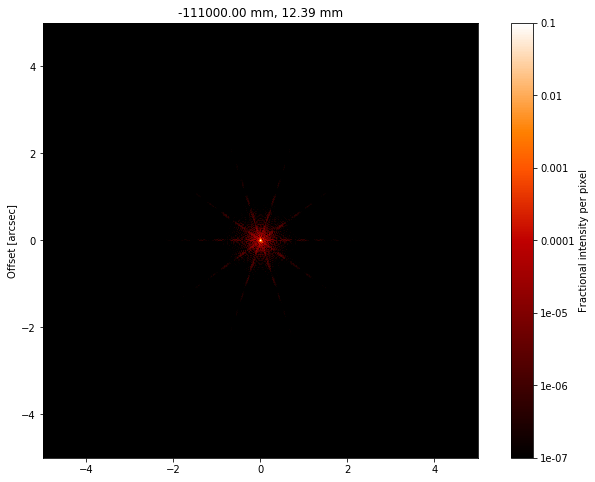

INFO:poppy:Initialized OpticalSystem: unnamed system
DEBUG:poppy:Initialized: Primary, fl =5.72e-01 m
DEBUG:poppy:Initialized: Secondary, fl =-1.10e+02 m
INFO:poppy:Added optic: Circle, radius=0.15 m after separation: 0.00e+00 m 
INFO:poppy:Added optic: Secondary Obscuration with 5 supports after separation: 0.00e+00 m 
INFO:poppy:Added optic: Primary after separation: 5.59e-01 m 
INFO:poppy:Added optic: Secondary after separation: 5.59e-01 m 
INFO:poppy:Added optic: focus after separation: 1.24e-02 m 
INFO:poppy:Calculating PSF with 1 wavelengths
INFO:poppy:User requested saving intermediate wavefronts in call to poppy.calc_psf
DEBUG:poppy:Already loaded wisdom prior to this calculation, not reloading.
INFO:poppy: Propagating wavelength = 6e-07 m meters
DEBUG:poppy:Padded WF array for oversampling by 2, to (2048, 2048).
DEBUG:poppy:Creating input wavefront with wavelength=0.6 microns,npix=1024, pixel scale=0.00029296875 m / pix
DEBUG:poppy:  Propagating wavefront to Optic: Circle, rad

	Entrance pupil diam:  0.3 m	npix: 1024	Beam ratio:0.5
	Optic: Circle, radius=0.15 m
	Pupil plane: Secondary Obscuration with 5 supports (Analytic)
	Propagation distance:  0.559337630333726 m
	Lens: Primary, with focal length 0.5717255 m
	Propagation distance:  0.559337630333726 m
	Lens: Secondary, with focal length -110.5 m
	Propagation distance:  0.012386481049867974 m
	Image plane: focus (Analytic)


DEBUG:poppy:  Multiplied WF by phasor for Optic: Circle, radius=0.15 m
DEBUG:poppy:normalizing at first plane (entrance pupil) to 1.0 total intensity
DEBUG:poppy:  Propagating wavefront to Pupil plane: Secondary Obscuration with 5 supports (Analytic) after distance 0.0 m 
DEBUG:poppy:  Multiplied WF by phasor for Pupil plane: Secondary Obscuration with 5 supports (Analytic)
DEBUG:poppy:  Propagating wavefront to Lens: Primary, with focal length 0.5717255 m after distance 0.559337630333726 m 
DEBUG:poppy:Beginning Fresnel Prop. Waist at z = 0.0 m
DEBUG:poppy:  Plane to Plane Regime, dz=0.559337630333726 m
DEBUG:poppy:  Constant Pixelscale: 0.00029296875 m / pix
DEBUG:poppy:   Using pyfftw
DEBUG:poppy:   Using pyfftw
DEBUG:poppy:------ Propagated to plane of type PlaneType.intermediate at z = 5.59e-01 m ------
DEBUG:poppy:------ Applying Lens: Primary ------
DEBUG:poppy:  Pre-Lens Beam Parameters: w_0:1.500e-01 m, z_w0=0.000e+00 m
z=5.593e-01 m, z_r=1.178e+05 m
DEBUG:poppy:  Beam radius 

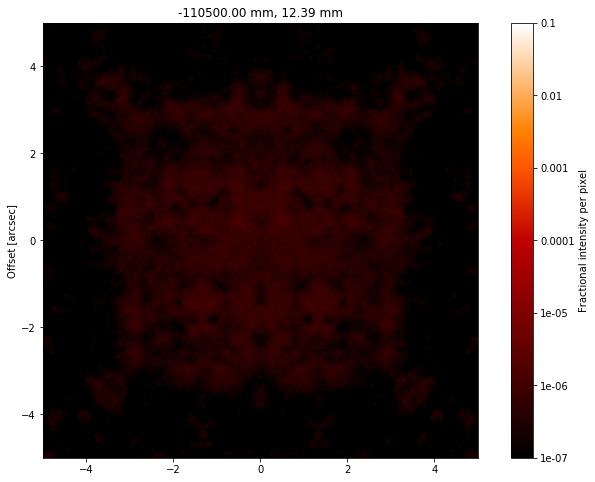

In [7]:
import logging
logging.basicConfig()
logging.getLogger().setLevel(logging.DEBUG)

for x in [111, 110.5]:
    m2_fl = -x*u.m
    m2_focus_sep = m2_fl*p/(m2_fl-p)
    epsilon = 0.0 * u.m

    tol = poppy.FresnelOpticalSystem(pupil_diameter=diam, npix=1024, beam_ratio=0.5) #25)
    m1 = poppy.QuadraticLens(m1_fl, name='Primary')
    m2 = poppy.QuadraticLens(m2_fl, name='Secondary')

    tol.add_optic(poppy.CircularAperture(radius=diam.value/2))
    tol.add_optic(poppy.SecondaryObscuration(secondary_radius=m2_rad,
                                     support_width=m2_strut_width,
                                     support_angle_offset=90, n_supports=m2_supports))
    tol.add_optic(m1, distance=m1_m2_sep)
    tol.add_optic(m2, distance=m1_m2_sep)
    tol.add_optic(poppy.ScalarTransmission(planetype=PlaneType.image, name='focus'), distance=m2_focus_sep+epsilon);

    tol.describe()
    plt.figure(figsize=(12,8))
    psf, waves = tol.calcPSF(wavelength=0.6e-6, display_intermediates=False, return_intermediates=True)

    poppy.display_PSF(psf,pixelscale=as_per_pixel,scale='log', imagecrop=10)
    plt.title('{:.2f} mm, {:.2f} mm'.format(1000*m2_fl.value, 1000*m2_focus_sep.value))
    plt.ylabel("Offset [arcsec]");
    plt.show()


	Entrance pupil diam:  0.3 m	npix: 1024	Beam ratio:0.5
	Optic: Circle, radius=0.15 m
	Pupil plane: Secondary Obscuration with 5 supports (Analytic)
	Propagation distance:  0.559337630333726 m
	Lens: Primary, with focal length 0.5717255 m
	Propagation distance:  0.559337630333726 m
	Lens: Secondary, with focal length -110.5 m
	Propagation distance:  -0.28761351895013204 m
	Image plane: focus (Analytic)


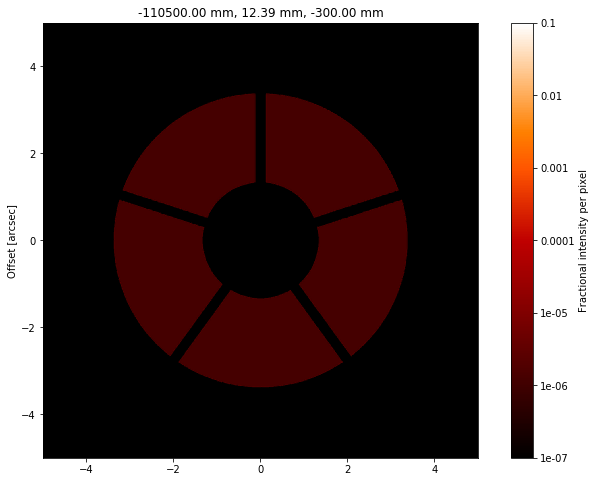

	Entrance pupil diam:  0.3 m	npix: 1024	Beam ratio:0.5
	Optic: Circle, radius=0.15 m
	Pupil plane: Secondary Obscuration with 5 supports (Analytic)
	Propagation distance:  0.559337630333726 m
	Lens: Primary, with focal length 0.5717255 m
	Propagation distance:  0.559337630333726 m
	Lens: Secondary, with focal length -110.5 m
	Propagation distance:  -0.18761351895013204 m
	Image plane: focus (Analytic)


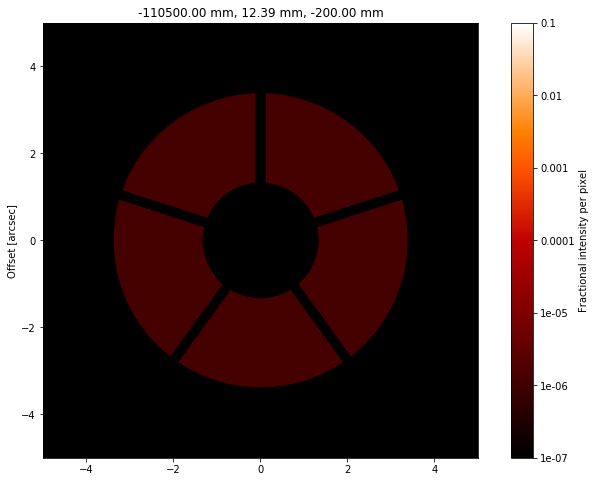

	Entrance pupil diam:  0.3 m	npix: 1024	Beam ratio:0.5
	Optic: Circle, radius=0.15 m
	Pupil plane: Secondary Obscuration with 5 supports (Analytic)
	Propagation distance:  0.559337630333726 m
	Lens: Primary, with focal length 0.5717255 m
	Propagation distance:  0.559337630333726 m
	Lens: Secondary, with focal length -110.5 m
	Propagation distance:  -0.08761351895013203 m
	Image plane: focus (Analytic)


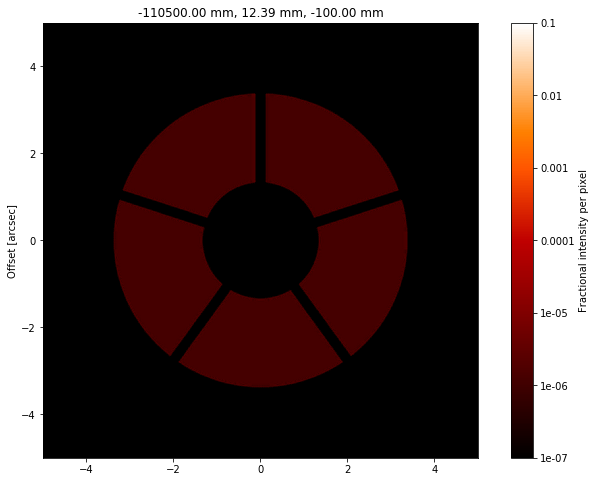

	Entrance pupil diam:  0.3 m	npix: 1024	Beam ratio:0.5
	Optic: Circle, radius=0.15 m
	Pupil plane: Secondary Obscuration with 5 supports (Analytic)
	Propagation distance:  0.559337630333726 m
	Lens: Primary, with focal length 0.5717255 m
	Propagation distance:  0.559337630333726 m
	Lens: Secondary, with focal length -110.5 m
	Propagation distance:  -0.03761351895013203 m
	Image plane: focus (Analytic)


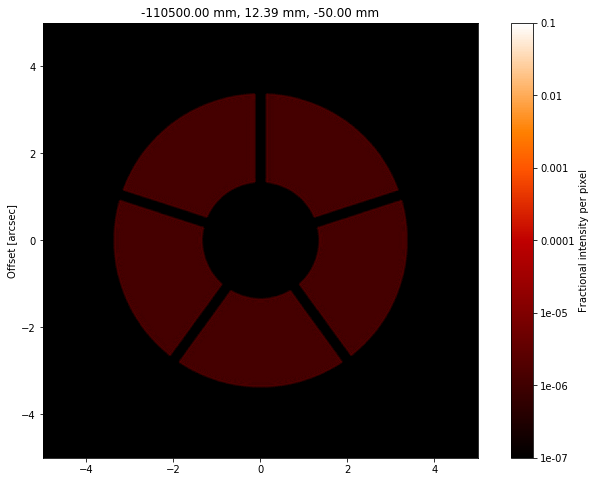

	Entrance pupil diam:  0.3 m	npix: 1024	Beam ratio:0.5
	Optic: Circle, radius=0.15 m
	Pupil plane: Secondary Obscuration with 5 supports (Analytic)
	Propagation distance:  0.559337630333726 m
	Lens: Primary, with focal length 0.5717255 m
	Propagation distance:  0.559337630333726 m
	Lens: Secondary, with focal length -110.5 m
	Propagation distance:  0.0023864810498679737 m
	Image plane: focus (Analytic)


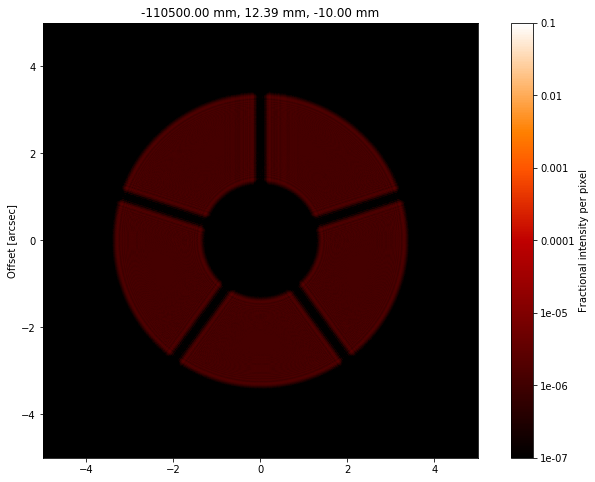

	Entrance pupil diam:  0.3 m	npix: 1024	Beam ratio:0.5
	Optic: Circle, radius=0.15 m
	Pupil plane: Secondary Obscuration with 5 supports (Analytic)
	Propagation distance:  0.559337630333726 m
	Lens: Primary, with focal length 0.5717255 m
	Propagation distance:  0.559337630333726 m
	Lens: Secondary, with focal length -110.5 m
	Propagation distance:  0.007386481049867974 m
	Image plane: focus (Analytic)


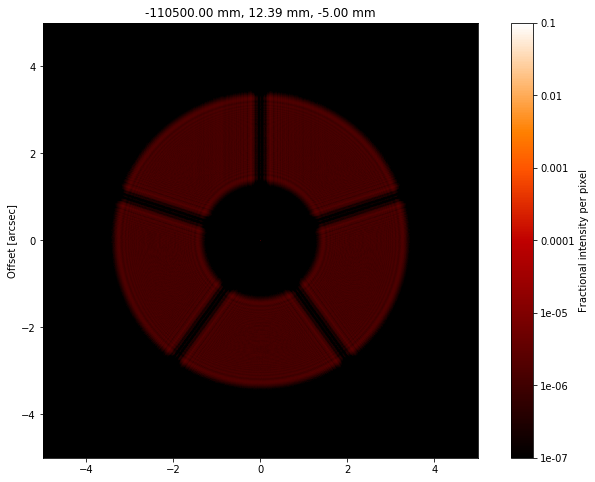

	Entrance pupil diam:  0.3 m	npix: 1024	Beam ratio:0.5
	Optic: Circle, radius=0.15 m
	Pupil plane: Secondary Obscuration with 5 supports (Analytic)
	Propagation distance:  0.559337630333726 m
	Lens: Primary, with focal length 0.5717255 m
	Propagation distance:  0.559337630333726 m
	Lens: Secondary, with focal length -110.5 m
	Propagation distance:  0.012386481049867974 m
	Image plane: focus (Analytic)


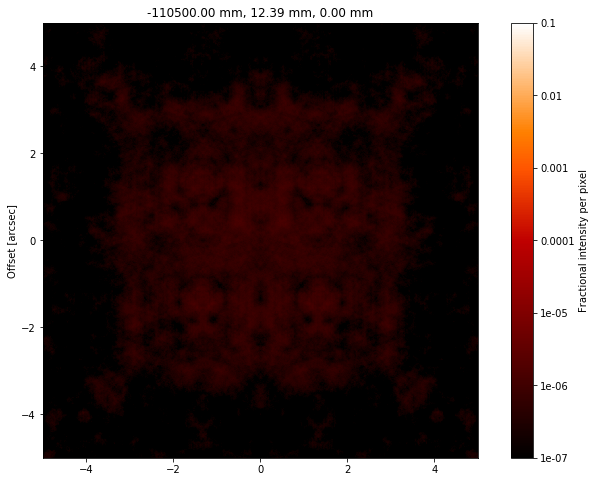

In [19]:
import logging
logging.basicConfig()
logging.getLogger().setLevel(logging.WARN)

diam = 0.3 * u.m
m1_fl = 0.5*1.143451 * u.m
m1_m2_sep = 0.559337630333726 * u.m
m2_rad = 0.059 * u.m
m2_strut_width = 0.01 * u.m
m2_supports = 5
p = m1_fl - m1_m2_sep

m2_fl = -110.5*u.m
m2_focus_sep = m2_fl*p/(m2_fl-p)
for e in [-300, -200,-100,-50,-10,-5,0]:    
    epsilon = e * u.mm

    tol = poppy.FresnelOpticalSystem(pupil_diameter=diam, npix=1024, beam_ratio=0.5) #25)
    m1 = poppy.QuadraticLens(m1_fl, name='Primary')
    m2 = poppy.QuadraticLens(m2_fl, name='Secondary')

    tol.add_optic(poppy.CircularAperture(radius=diam.value/2))
    tol.add_optic(poppy.SecondaryObscuration(secondary_radius=m2_rad,
                                     support_width=m2_strut_width,
                                     support_angle_offset=90, n_supports=m2_supports))
    tol.add_optic(m1, distance=m1_m2_sep)
    tol.add_optic(m2, distance=m1_m2_sep)
    tol.add_optic(poppy.ScalarTransmission(planetype=PlaneType.image, name='focus'), distance=m2_focus_sep+epsilon);

    tol.describe()
    plt.figure(figsize=(12,8))
    psf, waves = tol.calcPSF(wavelength=0.6e-6, display_intermediates=False, return_intermediates=True)

    poppy.display_PSF(psf,pixelscale=as_per_pixel,scale='log', imagecrop=10)
    plt.title('{:.2f} mm, {:.2f} mm, {:.2f} mm'.format(1000*m2_fl.value, 1000*m2_focus_sep.value, epsilon.value))
    plt.ylabel("Offset [arcsec]");
    plt.show()


INFO:poppy:Initialized OpticalSystem: unnamed system
DEBUG:poppy:Initialized: Primary, fl =5.72e-01 m
DEBUG:poppy:Initialized: Secondary, fl =-1.10e+02 m
INFO:poppy:Added optic: Circle, radius=0.15 m after separation: 0.00e+00 m 
INFO:poppy:Added optic: Secondary Obscuration with 5 supports after separation: 0.00e+00 m 
INFO:poppy:Added optic: Primary after separation: 5.59e-01 m 
INFO:poppy:Added optic: Secondary after separation: 5.59e-01 m 
INFO:poppy:Added optic: focus after separation: 1.14e-02 m 
INFO:poppy:Calculating PSF with 1 wavelengths
INFO:poppy:User requested saving intermediate wavefronts in call to poppy.calc_psf
DEBUG:poppy:Already loaded wisdom prior to this calculation, not reloading.
INFO:poppy: Propagating wavelength = 6e-07 m meters
DEBUG:poppy:Padded WF array for oversampling by 2, to (2048, 2048).
DEBUG:poppy:Creating input wavefront with wavelength=0.6 microns,npix=1024, pixel scale=0.00029296875 m / pix
DEBUG:poppy:  Propagating wavefront to Optic: Circle, rad

	Entrance pupil diam:  0.3 m	npix: 1024	Beam ratio:0.5
	Optic: Circle, radius=0.15 m
	Pupil plane: Secondary Obscuration with 5 supports (Analytic)
	Propagation distance:  0.559337630333726 m
	Lens: Primary, with focal length 0.5717255 m
	Propagation distance:  0.559337630333726 m
	Lens: Secondary, with focal length -110.5 m
	Propagation distance:  0.011386481049867975 m
	Image plane: focus (Analytic)


DEBUG:poppy:  Multiplied WF by phasor for Optic: Circle, radius=0.15 m
DEBUG:poppy:normalizing at first plane (entrance pupil) to 1.0 total intensity
DEBUG:poppy:  Propagating wavefront to Pupil plane: Secondary Obscuration with 5 supports (Analytic) after distance 0.0 m 
DEBUG:poppy:  Multiplied WF by phasor for Pupil plane: Secondary Obscuration with 5 supports (Analytic)
DEBUG:poppy:  Propagating wavefront to Lens: Primary, with focal length 0.5717255 m after distance 0.559337630333726 m 
DEBUG:poppy:Beginning Fresnel Prop. Waist at z = 0.0 m
DEBUG:poppy:  Plane to Plane Regime, dz=0.559337630333726 m
DEBUG:poppy:  Constant Pixelscale: 0.00029296875 m / pix
DEBUG:poppy:   Using pyfftw
DEBUG:poppy:   Using pyfftw
DEBUG:poppy:------ Propagated to plane of type PlaneType.intermediate at z = 5.59e-01 m ------
DEBUG:poppy:------ Applying Lens: Primary ------
DEBUG:poppy:  Pre-Lens Beam Parameters: w_0:1.500e-01 m, z_w0=0.000e+00 m
z=5.593e-01 m, z_r=1.178e+05 m
DEBUG:poppy:  Beam radius 

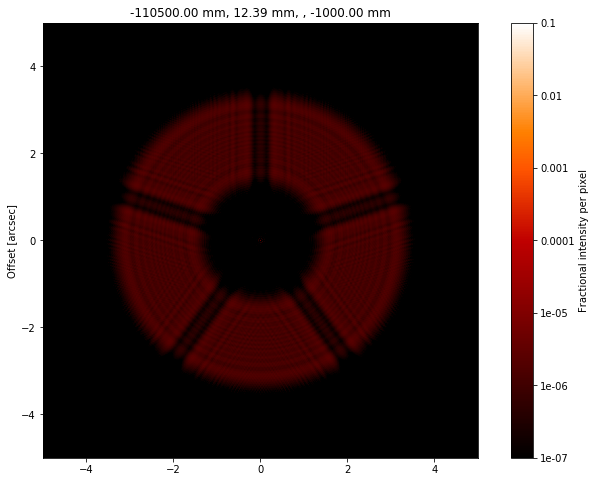

INFO:poppy:Initialized OpticalSystem: unnamed system
DEBUG:poppy:Initialized: Primary, fl =5.72e-01 m
DEBUG:poppy:Initialized: Secondary, fl =-1.10e+02 m
INFO:poppy:Added optic: Circle, radius=0.15 m after separation: 0.00e+00 m 
INFO:poppy:Added optic: Secondary Obscuration with 5 supports after separation: 0.00e+00 m 
INFO:poppy:Added optic: Primary after separation: 5.59e-01 m 
INFO:poppy:Added optic: Secondary after separation: 5.59e-01 m 
INFO:poppy:Added optic: focus after separation: 1.19e-02 m 
INFO:poppy:Calculating PSF with 1 wavelengths
INFO:poppy:User requested saving intermediate wavefronts in call to poppy.calc_psf
DEBUG:poppy:Already loaded wisdom prior to this calculation, not reloading.
INFO:poppy: Propagating wavelength = 6e-07 m meters
DEBUG:poppy:Padded WF array for oversampling by 2, to (2048, 2048).
DEBUG:poppy:Creating input wavefront with wavelength=0.6 microns,npix=1024, pixel scale=0.00029296875 m / pix
DEBUG:poppy:  Propagating wavefront to Optic: Circle, rad

	Entrance pupil diam:  0.3 m	npix: 1024	Beam ratio:0.5
	Optic: Circle, radius=0.15 m
	Pupil plane: Secondary Obscuration with 5 supports (Analytic)
	Propagation distance:  0.559337630333726 m
	Lens: Primary, with focal length 0.5717255 m
	Propagation distance:  0.559337630333726 m
	Lens: Secondary, with focal length -110.5 m
	Propagation distance:  0.011886481049867973 m
	Image plane: focus (Analytic)


DEBUG:poppy:  Multiplied WF by phasor for Optic: Circle, radius=0.15 m
DEBUG:poppy:normalizing at first plane (entrance pupil) to 1.0 total intensity
DEBUG:poppy:  Propagating wavefront to Pupil plane: Secondary Obscuration with 5 supports (Analytic) after distance 0.0 m 
DEBUG:poppy:  Multiplied WF by phasor for Pupil plane: Secondary Obscuration with 5 supports (Analytic)
DEBUG:poppy:  Propagating wavefront to Lens: Primary, with focal length 0.5717255 m after distance 0.559337630333726 m 
DEBUG:poppy:Beginning Fresnel Prop. Waist at z = 0.0 m
DEBUG:poppy:  Plane to Plane Regime, dz=0.559337630333726 m
DEBUG:poppy:  Constant Pixelscale: 0.00029296875 m / pix
DEBUG:poppy:   Using pyfftw
DEBUG:poppy:   Using pyfftw
DEBUG:poppy:------ Propagated to plane of type PlaneType.intermediate at z = 5.59e-01 m ------
DEBUG:poppy:------ Applying Lens: Primary ------
DEBUG:poppy:  Pre-Lens Beam Parameters: w_0:1.500e-01 m, z_w0=0.000e+00 m
z=5.593e-01 m, z_r=1.178e+05 m
DEBUG:poppy:  Beam radius 

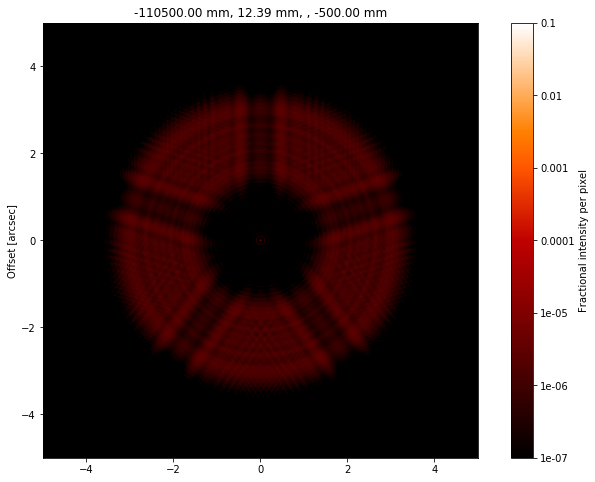

INFO:poppy:Initialized OpticalSystem: unnamed system
DEBUG:poppy:Initialized: Primary, fl =5.72e-01 m
DEBUG:poppy:Initialized: Secondary, fl =-1.10e+02 m
INFO:poppy:Added optic: Circle, radius=0.15 m after separation: 0.00e+00 m 
INFO:poppy:Added optic: Secondary Obscuration with 5 supports after separation: 0.00e+00 m 
INFO:poppy:Added optic: Primary after separation: 5.59e-01 m 
INFO:poppy:Added optic: Secondary after separation: 5.59e-01 m 
INFO:poppy:Added optic: focus after separation: 1.21e-02 m 
INFO:poppy:Calculating PSF with 1 wavelengths
INFO:poppy:User requested saving intermediate wavefronts in call to poppy.calc_psf
DEBUG:poppy:Already loaded wisdom prior to this calculation, not reloading.
INFO:poppy: Propagating wavelength = 6e-07 m meters
DEBUG:poppy:Padded WF array for oversampling by 2, to (2048, 2048).
DEBUG:poppy:Creating input wavefront with wavelength=0.6 microns,npix=1024, pixel scale=0.00029296875 m / pix
DEBUG:poppy:  Propagating wavefront to Optic: Circle, rad

	Entrance pupil diam:  0.3 m	npix: 1024	Beam ratio:0.5
	Optic: Circle, radius=0.15 m
	Pupil plane: Secondary Obscuration with 5 supports (Analytic)
	Propagation distance:  0.559337630333726 m
	Lens: Primary, with focal length 0.5717255 m
	Propagation distance:  0.559337630333726 m
	Lens: Secondary, with focal length -110.5 m
	Propagation distance:  0.012136481049867974 m
	Image plane: focus (Analytic)


DEBUG:poppy:  Multiplied WF by phasor for Optic: Circle, radius=0.15 m
DEBUG:poppy:normalizing at first plane (entrance pupil) to 1.0 total intensity
DEBUG:poppy:  Propagating wavefront to Pupil plane: Secondary Obscuration with 5 supports (Analytic) after distance 0.0 m 
DEBUG:poppy:  Multiplied WF by phasor for Pupil plane: Secondary Obscuration with 5 supports (Analytic)
DEBUG:poppy:  Propagating wavefront to Lens: Primary, with focal length 0.5717255 m after distance 0.559337630333726 m 
DEBUG:poppy:Beginning Fresnel Prop. Waist at z = 0.0 m
DEBUG:poppy:  Plane to Plane Regime, dz=0.559337630333726 m
DEBUG:poppy:  Constant Pixelscale: 0.00029296875 m / pix
DEBUG:poppy:   Using pyfftw
DEBUG:poppy:   Using pyfftw
DEBUG:poppy:------ Propagated to plane of type PlaneType.intermediate at z = 5.59e-01 m ------
DEBUG:poppy:------ Applying Lens: Primary ------
DEBUG:poppy:  Pre-Lens Beam Parameters: w_0:1.500e-01 m, z_w0=0.000e+00 m
z=5.593e-01 m, z_r=1.178e+05 m
DEBUG:poppy:  Beam radius 

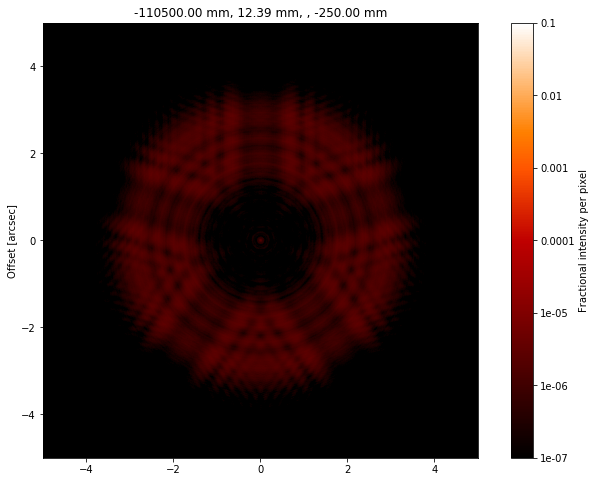

INFO:poppy:Initialized OpticalSystem: unnamed system
DEBUG:poppy:Initialized: Primary, fl =5.72e-01 m
DEBUG:poppy:Initialized: Secondary, fl =-1.10e+02 m
INFO:poppy:Added optic: Circle, radius=0.15 m after separation: 0.00e+00 m 
INFO:poppy:Added optic: Secondary Obscuration with 5 supports after separation: 0.00e+00 m 
INFO:poppy:Added optic: Primary after separation: 5.59e-01 m 
INFO:poppy:Added optic: Secondary after separation: 5.59e-01 m 
INFO:poppy:Added optic: focus after separation: 1.24e-02 m 
INFO:poppy:Calculating PSF with 1 wavelengths
INFO:poppy:User requested saving intermediate wavefronts in call to poppy.calc_psf
DEBUG:poppy:Already loaded wisdom prior to this calculation, not reloading.
INFO:poppy: Propagating wavelength = 6e-07 m meters
DEBUG:poppy:Padded WF array for oversampling by 2, to (2048, 2048).
DEBUG:poppy:Creating input wavefront with wavelength=0.6 microns,npix=1024, pixel scale=0.00029296875 m / pix
DEBUG:poppy:  Propagating wavefront to Optic: Circle, rad

	Entrance pupil diam:  0.3 m	npix: 1024	Beam ratio:0.5
	Optic: Circle, radius=0.15 m
	Pupil plane: Secondary Obscuration with 5 supports (Analytic)
	Propagation distance:  0.559337630333726 m
	Lens: Primary, with focal length 0.5717255 m
	Propagation distance:  0.559337630333726 m
	Lens: Secondary, with focal length -110.5 m
	Propagation distance:  0.012386481049867974 m
	Image plane: focus (Analytic)


DEBUG:poppy:  Multiplied WF by phasor for Optic: Circle, radius=0.15 m
DEBUG:poppy:normalizing at first plane (entrance pupil) to 1.0 total intensity
DEBUG:poppy:  Propagating wavefront to Pupil plane: Secondary Obscuration with 5 supports (Analytic) after distance 0.0 m 
DEBUG:poppy:  Multiplied WF by phasor for Pupil plane: Secondary Obscuration with 5 supports (Analytic)
DEBUG:poppy:  Propagating wavefront to Lens: Primary, with focal length 0.5717255 m after distance 0.559337630333726 m 
DEBUG:poppy:Beginning Fresnel Prop. Waist at z = 0.0 m
DEBUG:poppy:  Plane to Plane Regime, dz=0.559337630333726 m
DEBUG:poppy:  Constant Pixelscale: 0.00029296875 m / pix
DEBUG:poppy:   Using pyfftw
DEBUG:poppy:   Using pyfftw
DEBUG:poppy:------ Propagated to plane of type PlaneType.intermediate at z = 5.59e-01 m ------
DEBUG:poppy:------ Applying Lens: Primary ------
DEBUG:poppy:  Pre-Lens Beam Parameters: w_0:1.500e-01 m, z_w0=0.000e+00 m
z=5.593e-01 m, z_r=1.178e+05 m
DEBUG:poppy:  Beam radius 

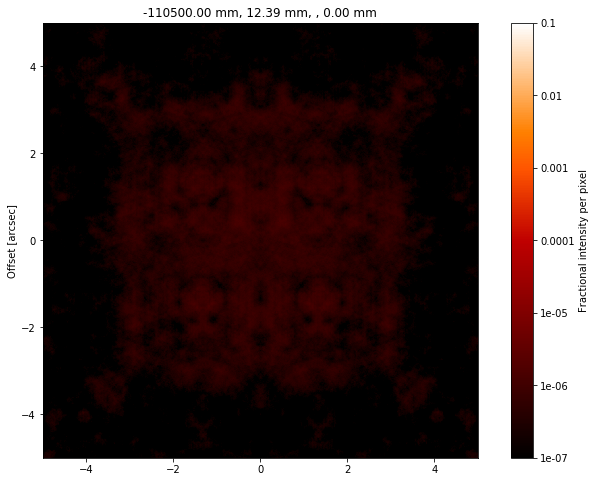

INFO:poppy:Initialized OpticalSystem: unnamed system
DEBUG:poppy:Initialized: Primary, fl =5.72e-01 m
DEBUG:poppy:Initialized: Secondary, fl =-1.10e+02 m
INFO:poppy:Added optic: Circle, radius=0.15 m after separation: 0.00e+00 m 
INFO:poppy:Added optic: Secondary Obscuration with 5 supports after separation: 0.00e+00 m 
INFO:poppy:Added optic: Primary after separation: 5.59e-01 m 
INFO:poppy:Added optic: Secondary after separation: 5.59e-01 m 
INFO:poppy:Added optic: focus after separation: 1.26e-02 m 
INFO:poppy:Calculating PSF with 1 wavelengths
INFO:poppy:User requested saving intermediate wavefronts in call to poppy.calc_psf
DEBUG:poppy:Already loaded wisdom prior to this calculation, not reloading.
INFO:poppy: Propagating wavelength = 6e-07 m meters
DEBUG:poppy:Padded WF array for oversampling by 2, to (2048, 2048).
DEBUG:poppy:Creating input wavefront with wavelength=0.6 microns,npix=1024, pixel scale=0.00029296875 m / pix
DEBUG:poppy:  Propagating wavefront to Optic: Circle, rad

	Entrance pupil diam:  0.3 m	npix: 1024	Beam ratio:0.5
	Optic: Circle, radius=0.15 m
	Pupil plane: Secondary Obscuration with 5 supports (Analytic)
	Propagation distance:  0.559337630333726 m
	Lens: Primary, with focal length 0.5717255 m
	Propagation distance:  0.559337630333726 m
	Lens: Secondary, with focal length -110.5 m
	Propagation distance:  0.012636481049867974 m
	Image plane: focus (Analytic)


DEBUG:poppy:  Multiplied WF by phasor for Optic: Circle, radius=0.15 m
DEBUG:poppy:normalizing at first plane (entrance pupil) to 1.0 total intensity
DEBUG:poppy:  Propagating wavefront to Pupil plane: Secondary Obscuration with 5 supports (Analytic) after distance 0.0 m 
DEBUG:poppy:  Multiplied WF by phasor for Pupil plane: Secondary Obscuration with 5 supports (Analytic)
DEBUG:poppy:  Propagating wavefront to Lens: Primary, with focal length 0.5717255 m after distance 0.559337630333726 m 
DEBUG:poppy:Beginning Fresnel Prop. Waist at z = 0.0 m
DEBUG:poppy:  Plane to Plane Regime, dz=0.559337630333726 m
DEBUG:poppy:  Constant Pixelscale: 0.00029296875 m / pix
DEBUG:poppy:   Using pyfftw
DEBUG:poppy:   Using pyfftw
DEBUG:poppy:------ Propagated to plane of type PlaneType.intermediate at z = 5.59e-01 m ------
DEBUG:poppy:------ Applying Lens: Primary ------
DEBUG:poppy:  Pre-Lens Beam Parameters: w_0:1.500e-01 m, z_w0=0.000e+00 m
z=5.593e-01 m, z_r=1.178e+05 m
DEBUG:poppy:  Beam radius 

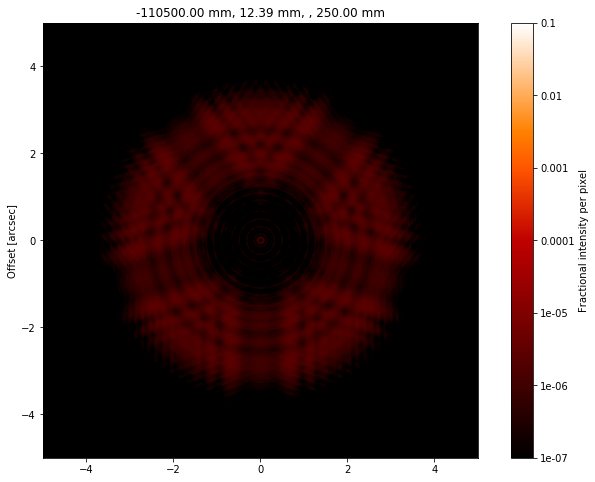

INFO:poppy:Initialized OpticalSystem: unnamed system
DEBUG:poppy:Initialized: Primary, fl =5.72e-01 m
DEBUG:poppy:Initialized: Secondary, fl =-1.10e+02 m
INFO:poppy:Added optic: Circle, radius=0.15 m after separation: 0.00e+00 m 
INFO:poppy:Added optic: Secondary Obscuration with 5 supports after separation: 0.00e+00 m 
INFO:poppy:Added optic: Primary after separation: 5.59e-01 m 
INFO:poppy:Added optic: Secondary after separation: 5.59e-01 m 
INFO:poppy:Added optic: focus after separation: 1.29e-02 m 
INFO:poppy:Calculating PSF with 1 wavelengths
INFO:poppy:User requested saving intermediate wavefronts in call to poppy.calc_psf
DEBUG:poppy:Already loaded wisdom prior to this calculation, not reloading.
INFO:poppy: Propagating wavelength = 6e-07 m meters
DEBUG:poppy:Padded WF array for oversampling by 2, to (2048, 2048).
DEBUG:poppy:Creating input wavefront with wavelength=0.6 microns,npix=1024, pixel scale=0.00029296875 m / pix
DEBUG:poppy:  Propagating wavefront to Optic: Circle, rad

	Entrance pupil diam:  0.3 m	npix: 1024	Beam ratio:0.5
	Optic: Circle, radius=0.15 m
	Pupil plane: Secondary Obscuration with 5 supports (Analytic)
	Propagation distance:  0.559337630333726 m
	Lens: Primary, with focal length 0.5717255 m
	Propagation distance:  0.559337630333726 m
	Lens: Secondary, with focal length -110.5 m
	Propagation distance:  0.012886481049867974 m
	Image plane: focus (Analytic)


DEBUG:poppy:  Multiplied WF by phasor for Optic: Circle, radius=0.15 m
DEBUG:poppy:normalizing at first plane (entrance pupil) to 1.0 total intensity
DEBUG:poppy:  Propagating wavefront to Pupil plane: Secondary Obscuration with 5 supports (Analytic) after distance 0.0 m 
DEBUG:poppy:  Multiplied WF by phasor for Pupil plane: Secondary Obscuration with 5 supports (Analytic)
DEBUG:poppy:  Propagating wavefront to Lens: Primary, with focal length 0.5717255 m after distance 0.559337630333726 m 
DEBUG:poppy:Beginning Fresnel Prop. Waist at z = 0.0 m
DEBUG:poppy:  Plane to Plane Regime, dz=0.559337630333726 m
DEBUG:poppy:  Constant Pixelscale: 0.00029296875 m / pix
DEBUG:poppy:   Using pyfftw
DEBUG:poppy:   Using pyfftw
DEBUG:poppy:------ Propagated to plane of type PlaneType.intermediate at z = 5.59e-01 m ------
DEBUG:poppy:------ Applying Lens: Primary ------
DEBUG:poppy:  Pre-Lens Beam Parameters: w_0:1.500e-01 m, z_w0=0.000e+00 m
z=5.593e-01 m, z_r=1.178e+05 m
DEBUG:poppy:  Beam radius 

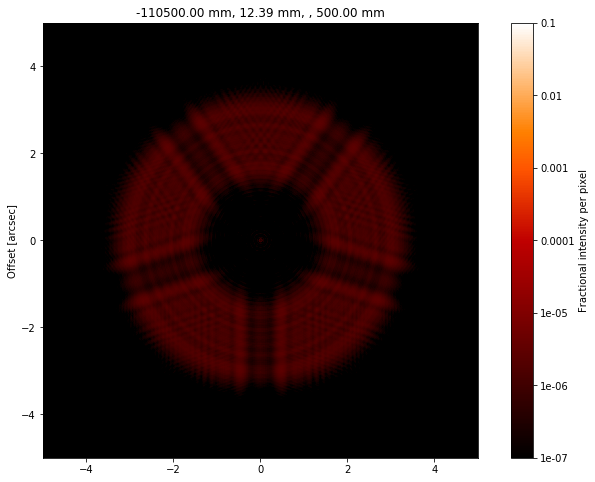

INFO:poppy:Initialized OpticalSystem: unnamed system
DEBUG:poppy:Initialized: Primary, fl =5.72e-01 m
DEBUG:poppy:Initialized: Secondary, fl =-1.10e+02 m
INFO:poppy:Added optic: Circle, radius=0.15 m after separation: 0.00e+00 m 
INFO:poppy:Added optic: Secondary Obscuration with 5 supports after separation: 0.00e+00 m 
INFO:poppy:Added optic: Primary after separation: 5.59e-01 m 
INFO:poppy:Added optic: Secondary after separation: 5.59e-01 m 
INFO:poppy:Added optic: focus after separation: 1.34e-02 m 
INFO:poppy:Calculating PSF with 1 wavelengths
INFO:poppy:User requested saving intermediate wavefronts in call to poppy.calc_psf
DEBUG:poppy:Already loaded wisdom prior to this calculation, not reloading.
INFO:poppy: Propagating wavelength = 6e-07 m meters
DEBUG:poppy:Padded WF array for oversampling by 2, to (2048, 2048).
DEBUG:poppy:Creating input wavefront with wavelength=0.6 microns,npix=1024, pixel scale=0.00029296875 m / pix
DEBUG:poppy:  Propagating wavefront to Optic: Circle, rad

	Entrance pupil diam:  0.3 m	npix: 1024	Beam ratio:0.5
	Optic: Circle, radius=0.15 m
	Pupil plane: Secondary Obscuration with 5 supports (Analytic)
	Propagation distance:  0.559337630333726 m
	Lens: Primary, with focal length 0.5717255 m
	Propagation distance:  0.559337630333726 m
	Lens: Secondary, with focal length -110.5 m
	Propagation distance:  0.013386481049867973 m
	Image plane: focus (Analytic)


DEBUG:poppy:  Multiplied WF by phasor for Optic: Circle, radius=0.15 m
DEBUG:poppy:normalizing at first plane (entrance pupil) to 1.0 total intensity
DEBUG:poppy:  Propagating wavefront to Pupil plane: Secondary Obscuration with 5 supports (Analytic) after distance 0.0 m 
DEBUG:poppy:  Multiplied WF by phasor for Pupil plane: Secondary Obscuration with 5 supports (Analytic)
DEBUG:poppy:  Propagating wavefront to Lens: Primary, with focal length 0.5717255 m after distance 0.559337630333726 m 
DEBUG:poppy:Beginning Fresnel Prop. Waist at z = 0.0 m
DEBUG:poppy:  Plane to Plane Regime, dz=0.559337630333726 m
DEBUG:poppy:  Constant Pixelscale: 0.00029296875 m / pix
DEBUG:poppy:   Using pyfftw
DEBUG:poppy:   Using pyfftw
DEBUG:poppy:------ Propagated to plane of type PlaneType.intermediate at z = 5.59e-01 m ------
DEBUG:poppy:------ Applying Lens: Primary ------
DEBUG:poppy:  Pre-Lens Beam Parameters: w_0:1.500e-01 m, z_w0=0.000e+00 m
z=5.593e-01 m, z_r=1.178e+05 m
DEBUG:poppy:  Beam radius 

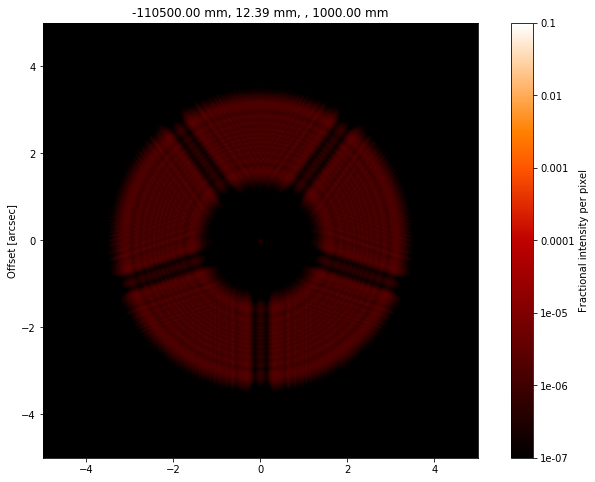

In [8]:
import logging
logging.basicConfig()
logging.getLogger().setLevel(logging.DEBUG)

for x in [110.5]:
    m2_fl = -x*u.m
    m2_focus_sep = m2_fl*p/(m2_fl-p)
    for e in [-1, -0.5, -0.25, 0, 0.25, 0.5, 1 ]:
        epsilon = e * u.mm

        tol = poppy.FresnelOpticalSystem(pupil_diameter=diam, npix=1024, beam_ratio=0.5) #25)
        m1 = poppy.QuadraticLens(m1_fl, name='Primary')
        m2 = poppy.QuadraticLens(m2_fl, name='Secondary')

        tol.add_optic(poppy.CircularAperture(radius=diam.value/2))
        tol.add_optic(poppy.SecondaryObscuration(secondary_radius=m2_rad,
                                         support_width=m2_strut_width,
                                         support_angle_offset=90, n_supports=m2_supports))
        tol.add_optic(m1, distance=m1_m2_sep)
        tol.add_optic(m2, distance=m1_m2_sep)
        tol.add_optic(poppy.ScalarTransmission(planetype=PlaneType.image, name='focus'), distance=m2_focus_sep+epsilon);

        tol.describe()
        plt.figure(figsize=(12,8))
        psf, waves = tol.calcPSF(wavelength=0.6e-6, display_intermediates=False, return_intermediates=True)

        poppy.display_PSF(psf,pixelscale=as_per_pixel,scale='log', imagecrop=10)
        plt.title('{:.2f} mm, {:.2f} mm, , {:.2f} mm'.format(1000*m2_fl.value, 1000*m2_focus_sep.value, 1000*epsilon.value))
        plt.ylabel("Offset [arcsec]");
        plt.show()


DEBUG:poppy:Displaying image normalized to peak = 1


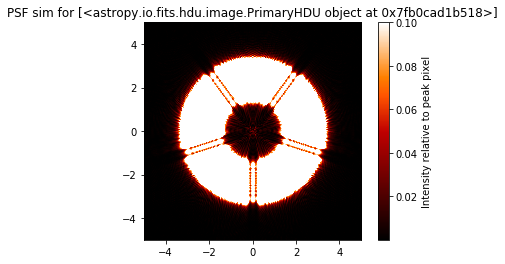

In [9]:
poppy.display_PSF(psf,pixelscale=as_per_pixel, normalize='peak',scale='linear', imagecrop=10)


## HST reference

INFO:poppy:Initialized OpticalSystem: unnamed system
DEBUG:poppy:Initialized: Primary, fl =5.52e+00 m
DEBUG:poppy:Initialized: Secondary, fl =-6.79e-01 m
INFO:poppy:Added optic: Circle, radius=0.15 m after separation: 0.00e+00 m 
INFO:poppy:Added optic: Secondary Obscuration with 5 supports after separation: 0.00e+00 m 
INFO:poppy:Added optic: Primary after separation: 4.91e+00 m 
INFO:poppy:Added optic: Secondary after separation: 4.91e+00 m 
INFO:poppy:Added optic: focus after separation: 6.39e+00 m 
INFO:poppy:Calculating PSF with 1 wavelengths
INFO:poppy:User requested saving intermediate wavefronts in call to poppy.calc_psf
DEBUG:poppy:Already loaded wisdom prior to this calculation, not reloading.
INFO:poppy: Propagating wavelength = 6e-07 m meters
DEBUG:poppy:Padded WF array for oversampling by 4, to (2048, 2048).
DEBUG:poppy:Creating input wavefront with wavelength=0.6 microns,npix=512, pixel scale=0.0005859375 m / pix
DEBUG:poppy:  Propagating wavefront to Optic: Circle, radiu

	Entrance pupil diam:  0.3 m	npix: 512	Beam ratio:0.25
	Optic: Circle, radius=0.15 m
	Pupil plane: Secondary Obscuration with 5 supports (Analytic)
	Propagation distance:  4.907028205 m
	Lens: Primary, with focal length 5.52085 m
	Propagation distance:  4.907028205 m
	Lens: Secondary, with focal length -0.6790325 m
	Propagation distance:  6.3919974 m
	Image plane: focus (Analytic)


DEBUG:poppy:  Multiplied WF by phasor for Optic: Circle, radius=0.15 m
DEBUG:poppy:normalizing at first plane (entrance pupil) to 1.0 total intensity
DEBUG:poppy:  Propagating wavefront to Pupil plane: Secondary Obscuration with 5 supports (Analytic) after distance 0.0 m 
DEBUG:poppy:  Multiplied WF by phasor for Pupil plane: Secondary Obscuration with 5 supports (Analytic)
DEBUG:poppy:  Propagating wavefront to Lens: Primary, with focal length 5.52085 m after distance 4.907028205 m 
DEBUG:poppy:Beginning Fresnel Prop. Waist at z = 0.0 m
DEBUG:poppy:  Plane to Plane Regime, dz=4.907028205 m
DEBUG:poppy:  Constant Pixelscale: 0.0005859375 m / pix
DEBUG:poppy:   Using pyfftw
DEBUG:poppy:   Using pyfftw
DEBUG:poppy:------ Propagated to plane of type PlaneType.intermediate at z = 4.91e+00 m ------
DEBUG:poppy:------ Applying Lens: Primary ------
DEBUG:poppy:  Pre-Lens Beam Parameters: w_0:1.500e-01 m, z_w0=0.000e+00 m
z=4.907e+00 m, z_r=1.178e+05 m
DEBUG:poppy:  Beam radius at Primary =1.5

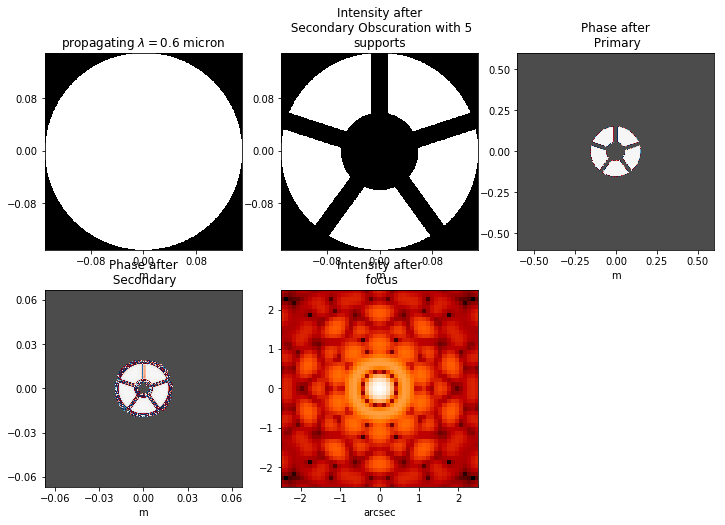

In [10]:
# HST example - Following example in PROPER Manual V2.0 page 49.
hst_diam = 0.3*u.m #2.4 * u.m
hst_fl_pri = 5.52085 * u.m
hst_m1_m2_sep = 4.907028205 * u.m
hst_fl_sec = -0.6790325 * u.m
hst_m2_focus_sep = 6.3919974 * u.m
hst_m2_rad = 0.059*u.m #0.396  * u.m

hst = poppy.FresnelOpticalSystem(pupil_diameter=hst_diam, npix=512, beam_ratio=0.25)
hst_m1 = poppy.QuadraticLens(hst_fl_pri, name='Primary')
hst_m2 = poppy.QuadraticLens(hst_fl_sec, name='Secondary')

hst.add_optic(poppy.CircularAperture(radius=hst_diam.value/2))
hst.add_optic(poppy.SecondaryObscuration(secondary_radius=hst_m2_rad,
                                 support_width=0.0264,
                                 support_angle_offset=90.0, n_supports=5))
hst.add_optic(hst_m1, distance=hst_m1_m2_sep)
hst.add_optic(hst_m2, distance=hst_m1_m2_sep)
hst.add_optic(poppy.ScalarTransmission(planetype=PlaneType.image, name='focus'), distance=hst_m2_focus_sep);


hst.describe()

plt.figure(figsize=(12,8))
psf, waves = hst.calcPSF(wavelength=0.6e-6, display_intermediates=True, return_intermediates=True)


DEBUG:poppy:Displaying image normalized to peak = 1


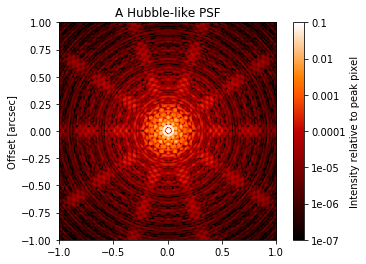

In [11]:
as_per_pixel = 13.52/2048.0
poppy.display_PSF(psf,pixelscale=as_per_pixel, normalize='peak', imagecrop=2)
plt.title('A Hubble-like PSF')
plt.ylabel("Offset [arcsec]");